In [6]:
import numpy as np

x = np.array([2, 3, 5, 7, 10])
y = np.array([40, 50, 70, 80, 110])

def standarize(array): 
    mean = np.mean(array)
    std = np.std(array, ddof=1)
    standarized_array = (array - mean)/std
    return standarized_array

stand_x= standarize(x)
stand_y = standarize(y)

print(f"Standarized X: {stand_x}")
print(f"Standarized Y: {stand_y}")

Standarized X: [-1.05940082 -0.74781234 -0.12463539  0.49854156  1.43330699]
Standarized Y: [-1.09544512 -0.73029674  0.          0.36514837  1.46059349]


In [13]:
array_matrix = np.stack((stand_x, stand_y), axis=0)

cov_matrix = np.cov(array_matrix)

print('Covariance matrix: ')
print(cov_matrix)

Covariance matrix: 
[[1.         0.99554022]
 [0.99554022 1.        ]]


Explained variance ratio: [0.16974474 0.15783042 0.1491046  0.14178163 0.12472224 0.10473585
 0.086024   0.06605652]
Cumulative variance: [0.16974474 0.32757516 0.47667975 0.61846138 0.74318362 0.84791948
 0.93394348 1.        ]


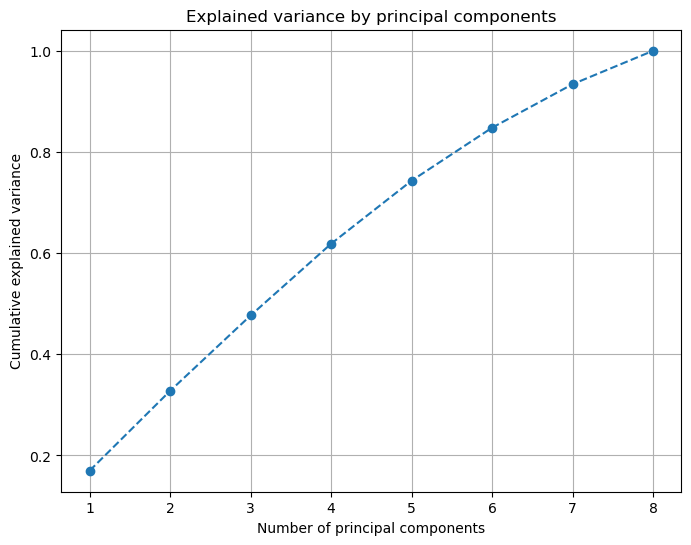

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler

# Load the dataset
file_path = "/Users/amandatofthagen/skole/Utveksling/Geo-spatial data science/Geo-spat/pca_dataset.csv"  
data = pd.read_csv(file_path)

#  Handle missing values (if any) and standardize the dataset
data.fillna(data.mean(), inplace=True)  # Fill missing values with column mean
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca_results = pca.fit_transform(standardized_data)

# Calculate explained variance ratio
explaine_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explaine_variance_ratio)

print(f'Explained variance ratio: {explaine_variance_ratio}')
print(f'Cumulative variance: {cumulative_variance}')
      
# Plot explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) +1 ), cumulative_variance, marker = 'o', linestyle = '--')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by principal components')
plt.grid()
plt.show()

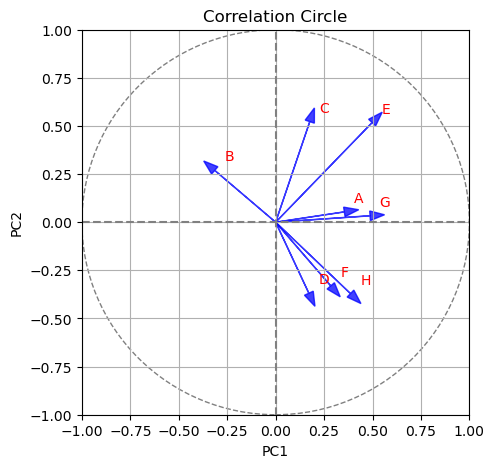

In [20]:
# Get the components (eigenvectors)
components = pca.components_

# Plot the correlation circle
plt.figure(figsize=(5,5))
for i, feature in enumerate(data.columns):
    plt.arrow(0, 0, components[0, i], components[1, i], head_width = 0.05, color = 'blue', alpha = 0.75)
    plt.text(components[0,i] + 0.05, components [1,i] + 0.05, feature, color = 'red')

# draw unit circle
circle = plt.Circle((0, 0), 1, color = 'gray', fill = False, linestyle = '--')
plt.gca().add_artist(circle)

plt.axhline(0, color = 'gray', linestyle = '--')
plt.axvline(0, color = 'gray', linestyle = '--')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Correlation Circle')
plt.grid()
plt.show()